## Only Pull the Subfolder

In [2]:
!git clone --depth 1 --no-checkout https://github.com/SonyaX20/Multi-task-Learning-Biomass-Estimation.git

Cloning into 'Multi-task-Learning-Biomass-Estimation'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 33 (delta 8), reused 33 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 42.05 MiB | 18.57 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [12]:
%%bash
cd Multi-task-Learning-Biomass-Estimation/
git sparse-checkout init
git sparse-checkout set biomassters/
git pull origin main

Already up to date.


From https://github.com/SonyaX20/Multi-task-Learning-Biomass-Estimation
 * branch            main       -> FETCH_HEAD


In [11]:
%%bash
cd Multi-task-Learning-Biomass-Estimation/
git fetch origin
git reset --hard origin/main
git sparse-checkout set biomassters/

HEAD is now at a242155 first commit


## Load Data
Actually no tree species included.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

### file: feature

In [15]:
# Replace 'your_csv_file.csv' with the actual path to your CSV file
fea_df = pd.read_csv('/content/Multi-task-Learning-Biomass-Estimation/biomassters/src/The_BioMassters_-_features_metadata.csv.csv')
fea_df.head()

,filename,chip_id,satellite,split,month,size,cksum,s3path_us,s3path_eu,s3path_as,corresponding_agbm
0,0003d2eb_S1_00.tif,0003d2eb,S1,train,September,1049524,3953454613,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
1,0003d2eb_S1_01.tif,0003d2eb,S1,train,October,1049524,3531005382,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
2,0003d2eb_S1_02.tif,0003d2eb,S1,train,November,1049524,1401197002,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
3,0003d2eb_S1_03.tif,0003d2eb,S1,train,December,1049524,3253084255,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
4,0003d2eb_S1_04.tif,0003d2eb,S1,train,January,1049524,2467836265,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif


,0,1,2,3,4,5,6,7,8,9,10,11
month,April,August,December,February,January,July,June,March,May,November,October,September
count,22924,22924,13252,21095,18820,22924,22924,22406,22924,20043,21095,21095


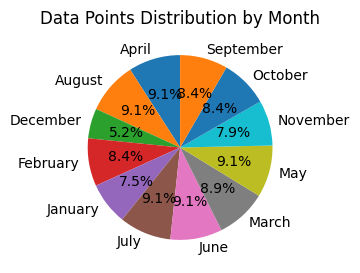

In [35]:
monthly_counts = fea_df.groupby(['month'])['filename'].count().reset_index()
monthly_counts.rename(columns={'filename': 'count'}, inplace=True)
display(monthly_counts.T)

plt.figure(figsize=(3, 3))
plt.pie(monthly_counts['count'], labels=monthly_counts['month'], autopct='%1.1f%%', startangle=90)
plt.title('Data Points Distribution by Month')
plt.show()

,split,count
0,test,63348
1,train,189078


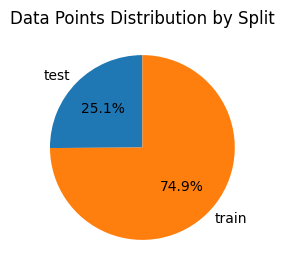

In [34]:
split_counts = fea_df.groupby(['split'])['filename'].count().reset_index()
split_counts.rename(columns={'filename': 'count'}, inplace=True)
display(split_counts)

plt.figure(figsize=(3, 3))
plt.pie(split_counts['count'], labels=split_counts['split'], autopct='%1.1f%%', startangle=90)
plt.title('Data Points Distribution by Split')
plt.show()

### file: train

In [36]:
# Replace 'your_csv_file.csv' with the actual path to your CSV file
train_df = pd.read_csv('/content/Multi-task-Learning-Biomass-Estimation/biomassters/src/The_BioMassters_-_train_agbm_metadata.csv.csv')
train_df.head()

,filename,chip_id,size,cksum,s3path_us,s3path_eu,s3path_as
0,0003d2eb_agbm.tif,0003d2eb,262482,2036246549,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...
1,000aa810_agbm.tif,000aa810,262482,2858468457,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...
2,000d7e33_agbm.tif,000d7e33,262482,277850822,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...
3,00184691_agbm.tif,00184691,262482,3502312579,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...
4,001b0634_agbm.tif,001b0634,262482,2397957274,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...
